# Linear Regression

#### Linear regression is a fundamental statistical method used to understand the relationship between a dependent variable and one or more independent variables. It aims to find the best-fitting linear equation that predicts the dependent variable based on the independent variables. In simpler terms, linear regression helps us analyze how changes in one variable are associated with changes in another, allowing us to make predictions and uncover patterns in data.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Linear Regression Equation

The equation for Linear Regression can be represented as:

$$ y = w_1 \cdot x_1 + w_2 \cdot x_2 + ... + w_n \cdot x_n + b $$

In vectorized form, the equation can be written as:

$$ y = X \cdot W + b $$

These are basically different representations of equation of line in n-dimensional space. In linear regression, we are also trying to the best fit line which explains most of the variance of the data. The line generalizing the data most efficiently.

- `w` or `W` here are weights/weight vector, these are the minions that help in predicting `y`.  They capture the relationship between independent variables and dependent variable.
- `x` or `X` is a column matrix of predictors/input features (also called features or independent variables) with n rows and m columns. 
- `b` is bias term


We will be using gradient descent to  optimize the weights of our model. Let's understand gradient descent  by taking a look at how it works - https://uclaacm.github.io/gradient-descent-visualiser/#playground

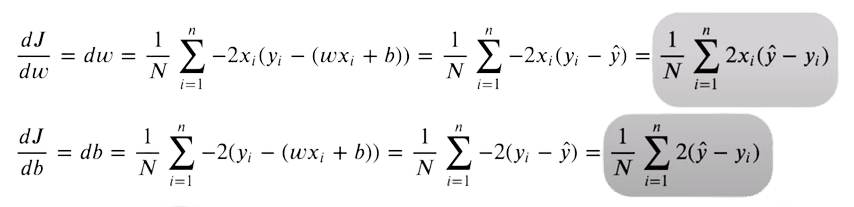

In [45]:
class LinearRegressor:
    def __init__(self, n_iter=1000, alpha=0.01):
        self.n_iter = n_iter
        self.alpha = alpha
        self.weights = None
        self.bias = None


In [46]:
def fit(self, x, y):
    d_points = x.shape[0]  # number of data points
    features = x.shape[1]  # number of features (independent variables)
    
    self.weights = np.zeros(features)   # initialize weights to zero
    self.bias = 0                           # initialize bias to zero
    
    for it in range(self.n_iter):
        y_pred = np.dot(x, self.weights) + self.bias # same as y = x.w + b
        # update the weights and bias using gradient descent algorithm
        dw = 2 * (1 / d_points) * np.dot(x.T, y_pred - y) # you can keep the multiple of two or not, it helps to achieve the convergence faster 
        db = 2 * (1 / d_points) * np.sum(y_pred - y)
        
        # Update weights and bias
        self.weights -= self.alpha * dw #update weight
        self.bias -= self.alpha * db #update bias
    
    return self

LinearRegressor.fit = fit

In [48]:
def predict(self, x):
    return np.dot(x, self.weights) + self.bias

LinearRegressor.predict = predict


In [50]:
def r2_score(self, x, y):
  y_pred = predict(self,x)
  ss_res = np.sum((y-y_pred)**2) ## ss residual
  ss_tot = np.sum((y- y.mean())**2) ## ss total
  score = (1- ss_res/ss_tot)
  return score

LinearRegressor.score=r2_score

# Lets Test the Algorithm

#### Generate some dummy data

In [83]:
# Set a random seed for reproducibility
np.random.seed(42)

# Number of data points and features
n_samples = 1000
n_features = 3

# Generate random features and weights, with random bias
X = np.random.rand(n_samples, n_features)
true_weights = np.array([3.5, 2.0, -1.0])
true_bias = 0.5
noise = np.random.normal(0, 0.1, n_samples)
y = np.dot(X, true_weights) + true_bias + noise

# Create a pandas DataFrame 
df = pd.DataFrame(data=X, columns=['Feature1', 'Feature2', 'Feature3'])
df['Target'] = y

In [84]:
df.head()

,Feature1,Feature2,Feature3,Target
0,0.374540,0.950714,0.731994,3.086319
1,0.598658,0.156019,0.155995,2.813048
2,0.058084,0.866176,0.601115,1.902887
3,0.708073,0.020584,0.969910,1.912918
4,0.832443,0.212339,0.181825,3.777597


In [85]:
df.describe()

,Feature1,Feature2,Feature3,Target
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.511980,0.494225,0.493475,2.787134
std,0.286836,0.296278,0.291694,1.208480
min,0.000135,0.000012,0.001354,-0.224476
25%,0.258527,0.235134,0.240994,1.906620
50%,0.518253,0.508731,0.493086,2.806257
75%,0.761254,0.759954,0.733935,3.727593
max,0.999718,0.998348,0.996697,5.651973


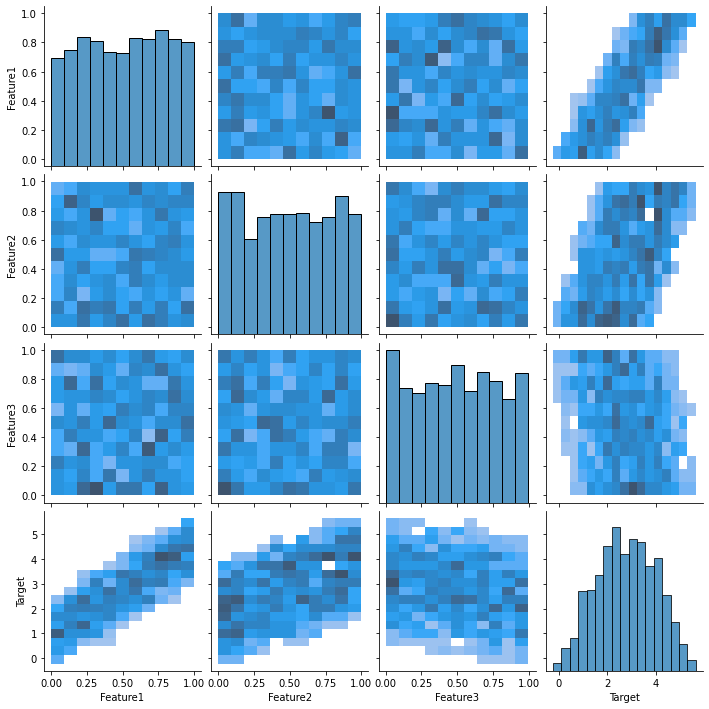

In [86]:
sns.pairplot(df, kind="hist") # check for relationships between the features

In [87]:

## Split the dataset
X= df.drop("Target", axis=1) # Drop "Target" column from dataframe
y = df["Target"] # Get "Target" column as separate variable y

# Split into training and testing sets (70%/30%)        
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 



In [88]:
linear_m = LinearRegressor(n_iter=100) # not giving much chance to learn :(

In [89]:
linear_m.fit(X_train, y_train)

In [93]:
linear_m.predict(X)[:10]

array([3.19361856, 2.42320215, 2.66337877, 2.81443691, 2.77514246,
       2.23625312, 2.56839677, 2.09533792, 2.87867568, 2.68998807])

In [92]:
linear_m.predict(X_test)[:10]

array([2.8008396 , 2.92665393, 2.89495251, 2.68979232, 2.31193929,
       2.60236396, 2.70608847, 2.84498598, 2.85920072, 2.81269449])

In [94]:
score = linear_m.score(X_train, y_train)
print("Linear Regression R2 score: ", score, ":((")

Linear Regression R2 score:  0.5081562450789214 :((


In [95]:
score = linear_m.score(X_test, y_test)
print("Linear Regression R2 score: ", score, ":((")

Linear Regression R2 score:  0.5031661048017004 :((


## Lets give this model some chance to learn this time

In [96]:
## Hyperparameter Tuning
linear_m1 = LinearRegressor(n_iter=1000) # 1000 iterations

In [97]:
linear_m1.fit(X_train, y_train)

In [98]:
score = linear_m1.score(X_train, y_train)
print("Linear Regression R2 score: ", score, "(:D)")

Linear Regression R2 score:  0.9604535990079711 (:D)


In [99]:
score = linear_m1.score(X_test, y_test)
print("Linear Regression R2 score: ", score, "(:D)")

Linear Regression R2 score:  0.9571885034283847 (:D)


### That was a huge jump from model m to to model m1, m's score was  0.50 and m1's  is 0.96 

Text(0, 0.5, 'R2 Score')

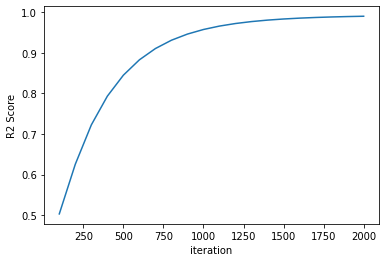

In [100]:
## Let's visualize this effect of number of iterations 
scores=[]
iters=[]
for  i in range(100, 2100, 100):
    n_model = LinearRegressor(n_iter=i)
    n_model.fit(X_train, y_train)
    score = n_model.score(X_test, y_test)
    scores.append(score)
    iters.append(i)
    
    
sns.lineplot(x=iters,y=scores)    
plt.xlabel("iteration")
plt.ylabel("R2 Score")

    